In [1]:
%matplotlib inline

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from celluloid import Camera
from IPython.display import HTML

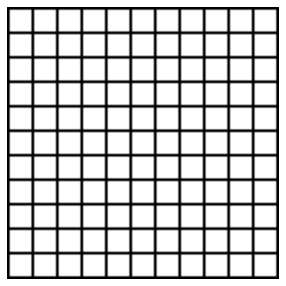

In [3]:
#draw and save image
image = np.ones((100, 100))
for x in range(image.shape[0]):
    for y in range(image.shape[0]):
        if (x % 9) == 0:
            image[x, y] = 0
        if (y % 9) == 0:
            image[x, y] = 0

fig = plt.figure(figsize=(5, 5))

img = plt.imshow(image, cmap="gray")
plt.axis("off")
plt.gca().set_aspect("equal")
plt.savefig("./test.png", bbox_inches='tight', transparent=True, pad_inches=0)

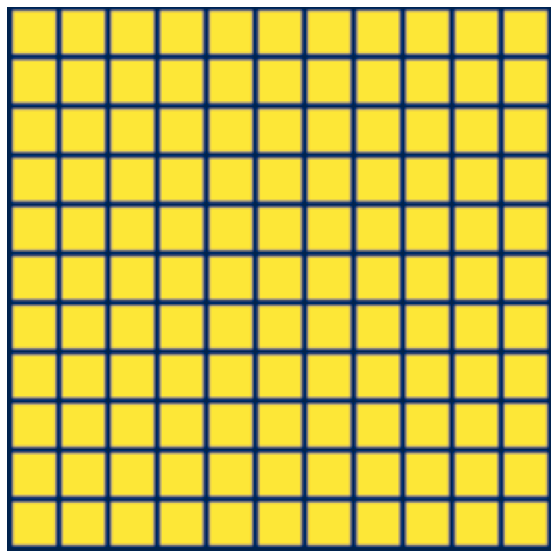

In [4]:
srcImage = cv.imread("./test.png", cv.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(10, 10))
plt.axis("off")
camera = Camera(fig)

srcPoints = np.array( [[0, 0], 
                       [srcImage.shape[1] - 1, 0], 
                       [0, srcImage.shape[0] - 1], 
                       [srcImage.shape[1] - 1, srcImage.shape[1] - 1]]).astype(np.float32)

dstImages = []
for delta in range(0, 100, 2):
    dstPoints = np.array([[delta, delta], 
                        [(srcImage.shape[1] - 1) - delta, delta], 
                        [0, (srcImage.shape[0] - 1)], 
                        [(srcImage.shape[1] - 1), srcImage.shape[1] - 1 ]] ).astype(np.float32)
    
    
    matrix = cv.findHomography(srcPoints, dstPoints)[0]
    dstImage = cv.warpPerspective(srcImage, matrix, (srcImage.shape[1], srcImage.shape[0]))
    dstImages.append(dstImage)
    
    #plt.scatter(dstPoints[:, 0], dstPoints[:, 1], c="red", s=100)

for dstImage in dstImages:
    plt.imshow(dstImage, cmap="cividis")
    camera.snap()
    
    
for dstImage in reversed(dstImages):
    plt.imshow(dstImage, cmap="cividis")
    camera.snap()
    

camera.animate().save("homography.gif")
HTML(camera.animate().to_html5_video())
